## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset 

In [2]:
dataset=pd.read_csv('RELIANCE.NS.csv',index_col='Date',parse_dates=True)
dataset.head(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-12,41.272720,43.557716,40.294456,43.086433,31.985790,84793235.0
2000-01-13,43.700527,45.185776,43.429184,44.535976,33.061878,119569925.0
2000-01-14,44.200371,45.935539,44.200371,45.171494,33.533665,94253808.0
2000-01-17,45.449978,46.114052,43.850479,44.093262,32.733223,75127904.0
2000-01-18,44.128963,45.549946,43.636261,44.871586,33.311028,70605468.0
2000-01-19,46.106911,46.399677,45.157211,45.642773,33.883507,80395046.0
2000-01-20,45.699898,46.399677,44.350323,44.678791,33.167896,108034978.0
2000-01-21,44.657368,46.899521,44.557400,46.606754,34.599155,119997270.0
2000-01-24,46.485367,47.392223,45.985523,46.578194,34.577950,92172116.0


In [3]:
dat = dataset.asfreq('b')
dat=dat.interpolate(method='linear')
dat.index

DatetimeIndex(['2000-01-12', '2000-01-13', '2000-01-14', '2000-01-17',
               '2000-01-18', '2000-01-19', '2000-01-20', '2000-01-21',
               '2000-01-24', '2000-01-25',
               ...
               '2024-04-29', '2024-04-30', '2024-05-01', '2024-05-02',
               '2024-05-03', '2024-05-06', '2024-05-07', '2024-05-08',
               '2024-05-09', '2024-05-10'],
              dtype='datetime64[ns]', name='Date', length=6348, freq='B')

In [4]:
data=dataset.copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6080 entries, 2000-01-12 to 2024-05-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6070 non-null   float64
 1   High       6070 non-null   float64
 2   Low        6070 non-null   float64
 3   Close      6070 non-null   float64
 4   Adj Close  6070 non-null   float64
 5   Volume     6070 non-null   float64
dtypes: float64(6)
memory usage: 461.5 KB


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000,6.070000e+03
mean,692.901662,700.779036,684.462897,692.315300,669.210490,1.748194e+07
std,747.841723,754.955301,740.374447,747.398448,750.659236,1.899270e+07
min,29.347902,31.347273,28.155420,29.019436,21.542967,0.000000e+00
25%,118.962547,120.283558,118.146732,118.919701,103.143471,6.584325e+06
50%,432.022217,437.519638,426.661942,431.987931,397.093735,1.049865e+07
75%,854.775345,863.370071,846.100617,854.123901,831.394439,2.112260e+07
max,3011.550049,3024.899902,2974.449951,3014.800049,3014.800049,3.161448e+08


In [7]:
data.isnull().sum()

Open         10
High         10
Low          10
Close        10
Adj Close    10
Volume       10
dtype: int64

## EDA [Elobarotory Data Analysis]

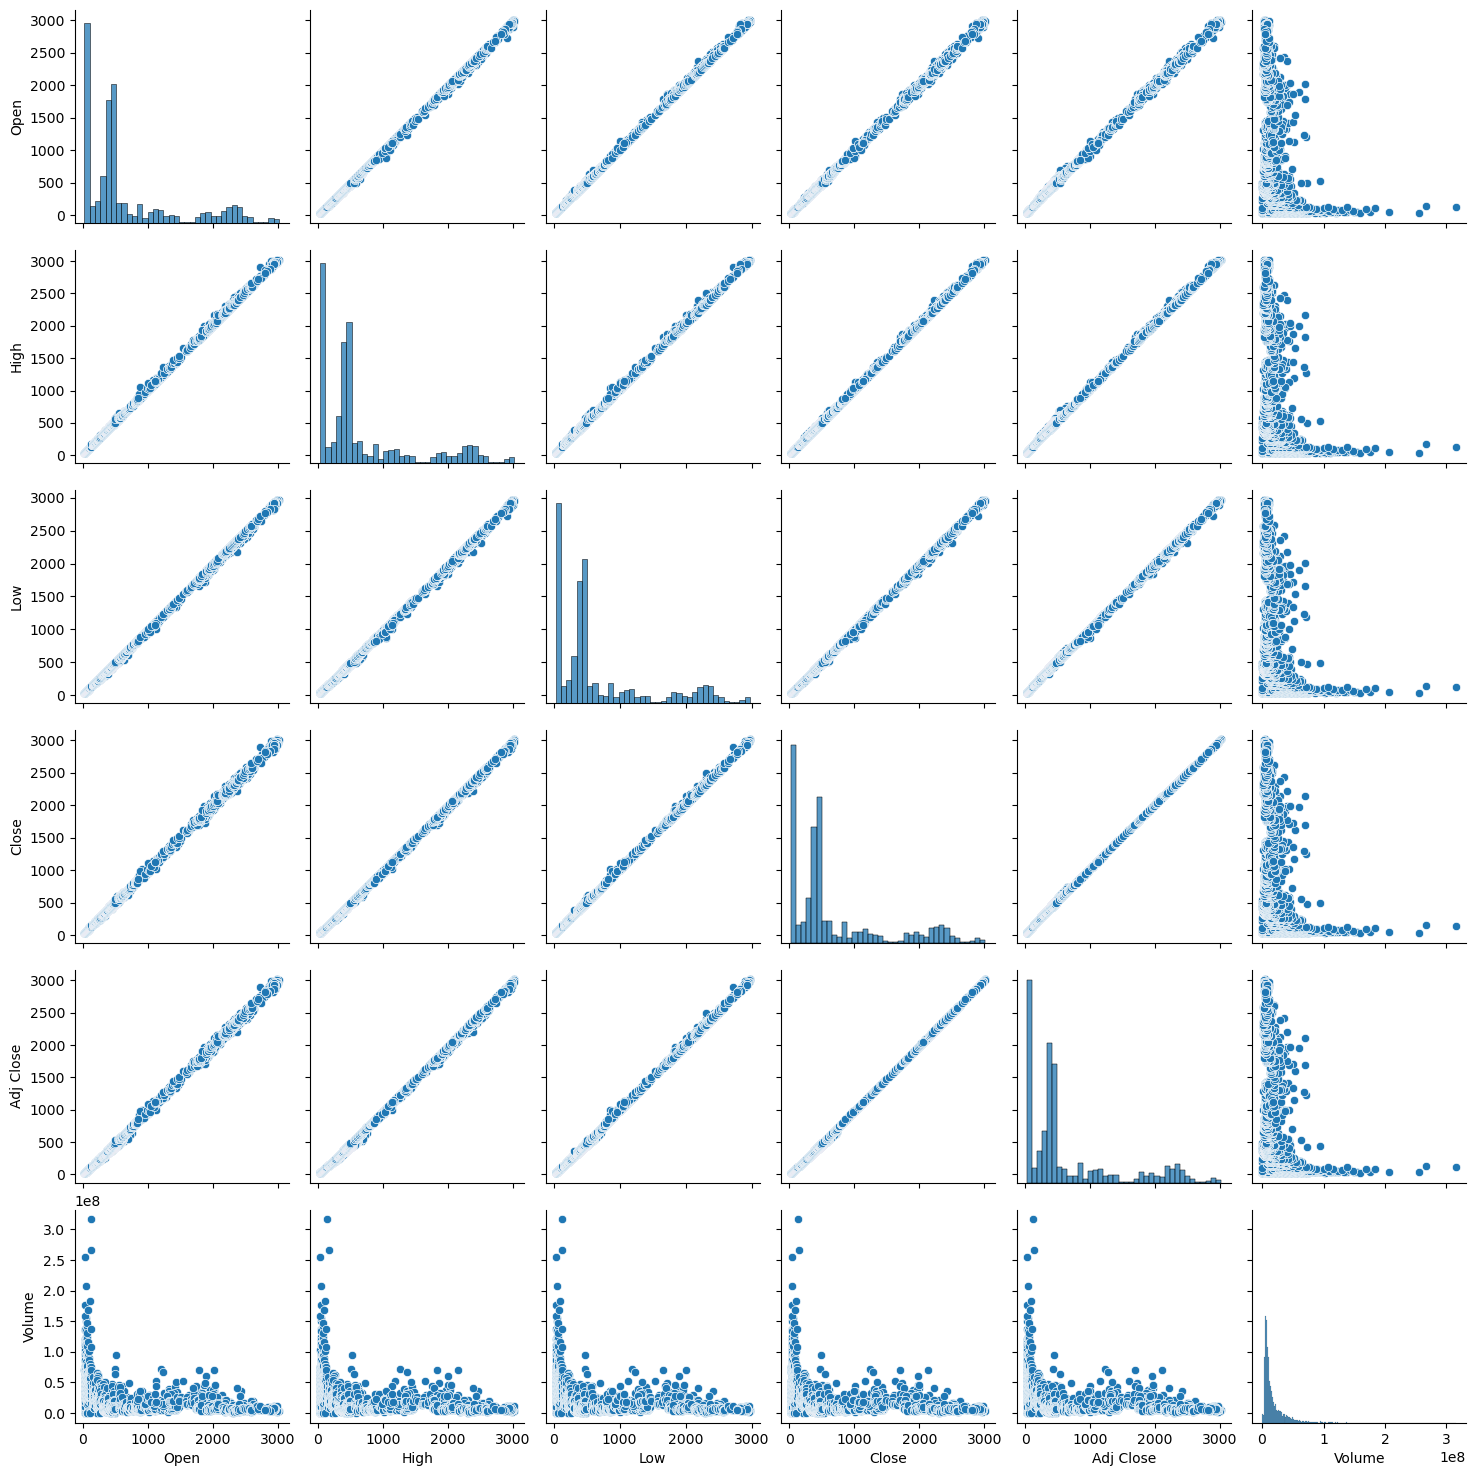

In [8]:
sns.pairplot(data)
plt.show()

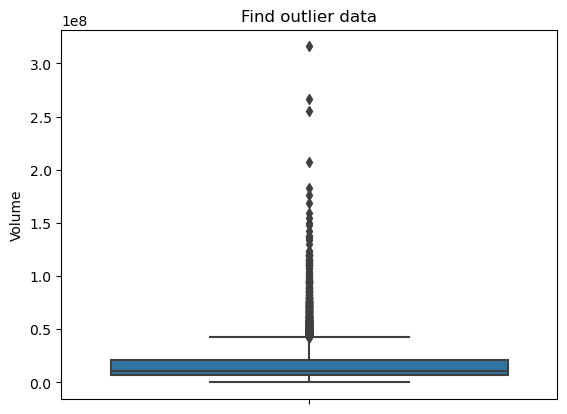

In [9]:
sns.boxplot(y='Volume',data=data)
plt.title('Find outlier data')
plt.show()

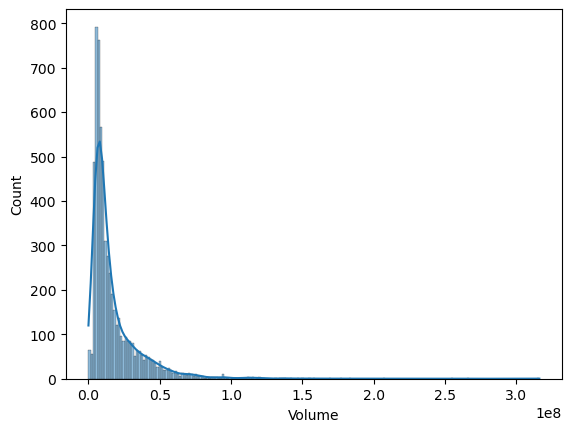

In [10]:
# Distribution Curve
sns.histplot(data['Volume'],kde=True)
plt.show()

### To find the Unique value in the dataset

In [11]:
for i in data:
    print(i,len(data[i].unique()))

Open 4636
High 5082
Low 5177
Close 5571
Adj Close 5831
Volume 6015


In [12]:
# Rounding the values
data=np.round(data)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-12,41.0,44.0,40.0,43.0,32.0,84793235.0
2000-01-13,44.0,45.0,43.0,45.0,33.0,119569925.0
2000-01-14,44.0,46.0,44.0,45.0,34.0,94253808.0
2000-01-17,45.0,46.0,44.0,44.0,33.0,75127904.0
2000-01-18,44.0,46.0,44.0,45.0,33.0,70605468.0


In [13]:
# To fill the null values by having their mean value of corresponding column
data.fillna(data.mean(),inplace=True)

In [14]:
# To replace zero in the dataset
mean=data.replace(0,np.nan).mean()
mean.round(3)

Open         6.929040e+02
High         7.007830e+02
Low          6.844560e+02
Close        6.923150e+02
Adj Close    6.692160e+02
Volume       1.764738e+07
dtype: float64

In [15]:
data.replace(0,mean,inplace=True)

In [16]:
data=data.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6080 entries, 2000-01-12 to 2024-05-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Open       6080 non-null   int32
 1   High       6080 non-null   int32
 2   Low        6080 non-null   int32
 3   Close      6080 non-null   int32
 4   Adj Close  6080 non-null   int32
 5   Volume     6080 non-null   int32
dtypes: int32(6)
memory usage: 319.0 KB


In [17]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-12,41,44,40,43,32,84793235
2000-01-13,44,45,43,45,33,119569925
2000-01-14,44,46,44,45,34,94253808
2000-01-17,45,46,44,44,33,75127904
2000-01-18,44,46,44,45,33,70605468


In [18]:
data['Daily Return'] = ((data['Close'] - data['Open']) / data['Open']) * 100
data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2000-01-12,41,44,40,43,32,84793235,4.878049
2000-01-13,44,45,43,45,33,119569925,2.272727
2000-01-14,44,46,44,45,34,94253808,2.272727
2000-01-17,45,46,44,44,33,75127904,-2.222222
2000-01-18,44,46,44,45,33,70605468,2.272727


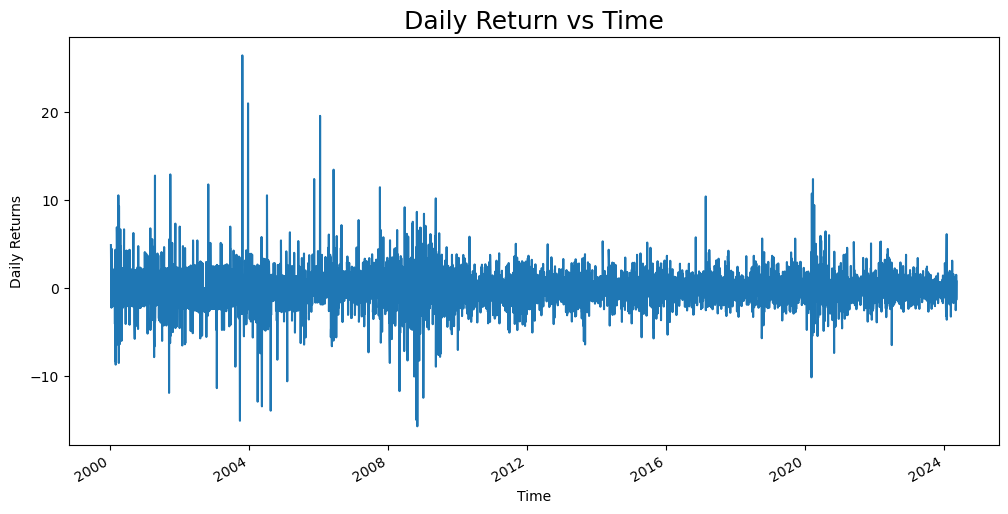

In [19]:
data['Daily Return'].plot(figsize=(12,6))
plt.title('Daily Return vs Time', fontsize=18)
plt.xlabel('Time')
plt.ylabel('Daily Returns')
plt.show()

### Measure Max Closing Price


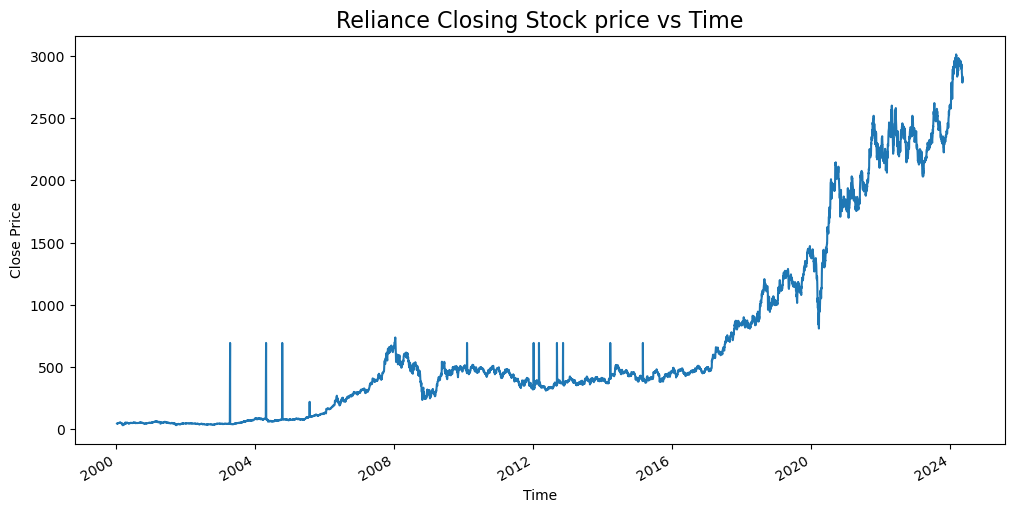

In [20]:
plt.figure(figsize=(12,6))
data['Close'].plot()
plt.title('Reliance Closing Stock price vs Time',fontsize=16)
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.show()

In [21]:
#to illustare exact time when stock closing price reched to max
data.iloc[[data['Close'].argmax()]]

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2024-03-04,2981,3025,2974,3015,3015,5012210,1.140557


### Stock Volume over Time period

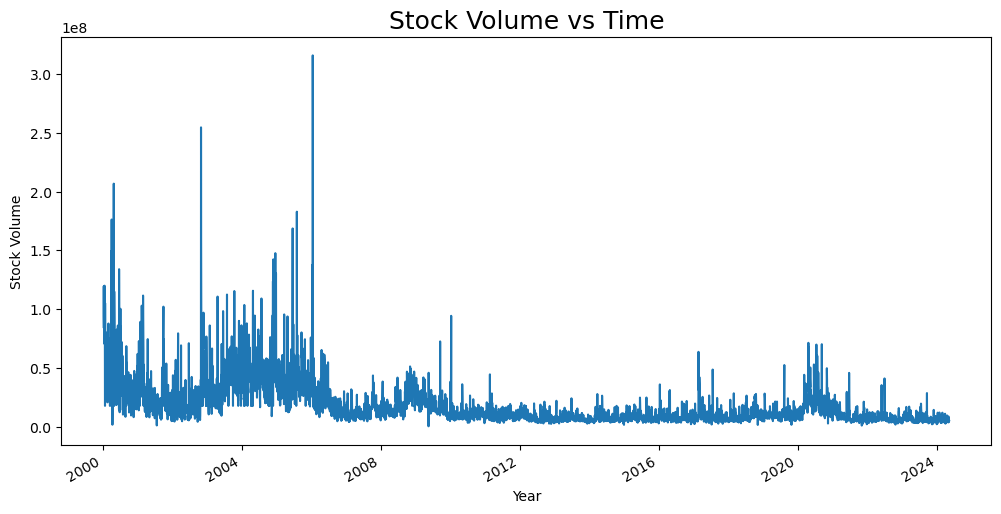

In [22]:
plt.figure(figsize=(12,6))
data['Volume'].plot()
plt.xlabel('Year')
plt.ylabel('Stock Volume')
plt.title('Stock Volume vs Time', fontsize=18)
plt.show()

## Model Building 

In [23]:
data2=data.copy()

In [24]:
data2.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2000-01-12,41,44,40,43,32,84793235,4.878049
2000-01-13,44,45,43,45,33,119569925,2.272727
2000-01-14,44,46,44,45,34,94253808,2.272727
2000-01-17,45,46,44,44,33,75127904,-2.222222
2000-01-18,44,46,44,45,33,70605468,2.272727


In [25]:
data2=data2.resample('1M').mean()
print(data2.head())

                 Open       High        Low      Close  Adj Close  \
Date                                                                
2000-01-31  45.428571  46.428571  44.714286  45.857143  34.071429   
2000-02-29  49.285714  50.142857  48.142857  48.904762  36.238095   
2000-03-31  36.304348  37.521739  34.782609  36.043478  26.913043   
2000-04-30  46.950000  48.300000  45.450000  47.000000  35.750000   
2000-05-31  46.434783  47.260870  45.391304  46.304348  35.173913   

                  Volume  Daily Return  
Date                                    
2000-01-31  8.496797e+07      0.997341  
2000-02-29  5.098821e+07     -0.761119  
2000-03-31  5.678774e+07     -0.599608  
2000-04-30  1.036972e+08      0.283322  
2000-05-31  4.807299e+07     -0.240700  


In [26]:
data1=data2.copy()

In [27]:
data1=pd.DataFrame(data1['Close'])
data1.head(20)

,Close
Date,
2000-01-31,45.857143
2000-02-29,48.904762
2000-03-31,36.043478
2000-04-30,47.000000
2000-05-31,46.304348
2000-06-30,47.954545
2000-07-31,50.428571
2000-08-31,47.608696
2000-09-30,50.857143


In [28]:
data1.to_csv('data1.csv',index=True)

## Check Data Stationarity


In [29]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #calculate moving average
    movingAverage = timeseries.rolling(window = 12).mean()
    movingAverage_std = timeseries.rolling(window = 12).std()
   
    #plot rolling statistics
    plt.figure(figsize=(12,6))
    original = plt.plot(timeseries, color = 'blue',label ='Original')
    mean = plt.plot(movingAverage, color ='red', label = 'Rolling Mean')
    std = plt.plot(movingAverage_std, color = 'black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.xlabel('year')
    plt.ylabel('Closing price in log scale')
    plt.title('Rolling mean and Standard Deviation')
    plt.show()
    
    #perform dickey-fuller test
    print('Result of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Close'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statistics','P-value','#Lags used','Closing Price'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] =  value
    print(dfoutput)

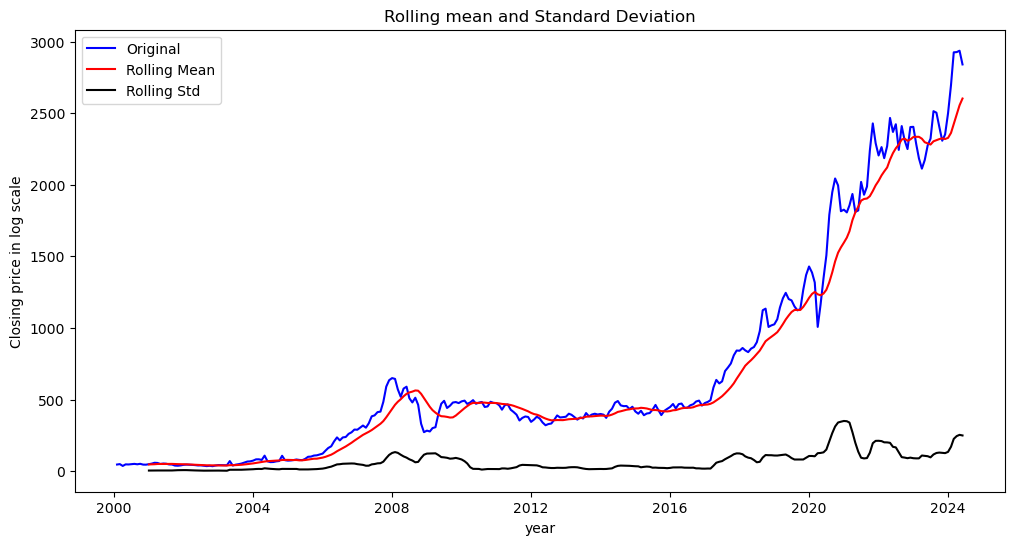

Result of Dickey-Fuller Test:
Test statistics           2.166476
P-value                   0.998854
#Lags used               14.000000
Closing Price           278.000000
Critical Value (1%)      -3.454094
Critical Value (5%)      -2.871993
Critical Value (10%)     -2.572340
dtype: float64


In [30]:
test_stationarity(data1)

In [31]:
# 'Dickey Fuller Test' Analysis:
#The P-values is 0.99 it should be less that 0.5. 
#Test Statistic’ is greater than Critical Value. 
#It should be less than the Critical Value to reject the null hypothesis.
#Stationary time series is when the mean and variance are constant over time. 
#Hence, It can be clearly observed that the data is not starionary.

## Steps to make Data Staionarity


### 1.Log Transformation

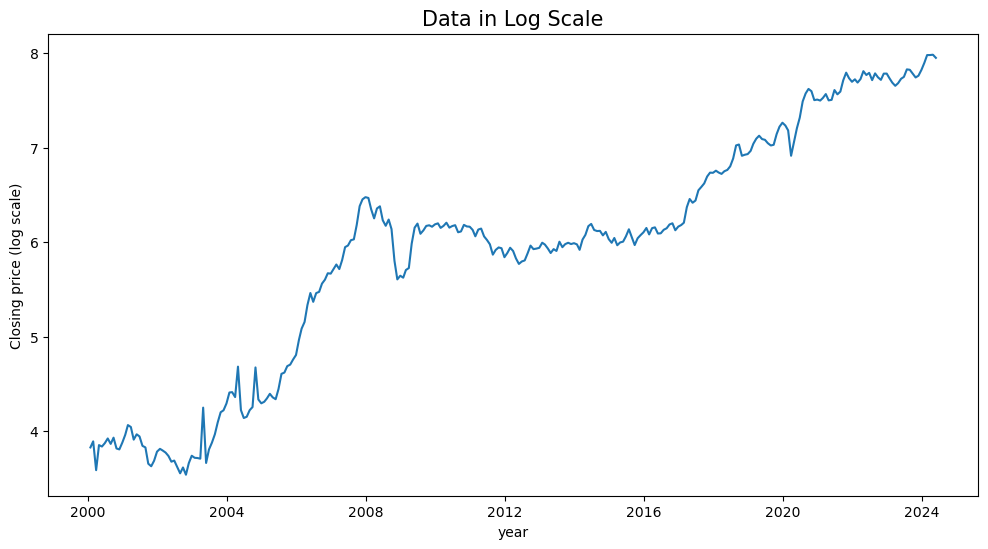

In [32]:
data_log = np.log(data1)
plt.figure(figsize=(12,6))
plt.plot(data_log)
plt.xlabel('year')
plt.ylabel('Closing price (log scale)')
plt.title('Data in Log Scale', fontsize=15)
plt.show()

### 2.Moving average


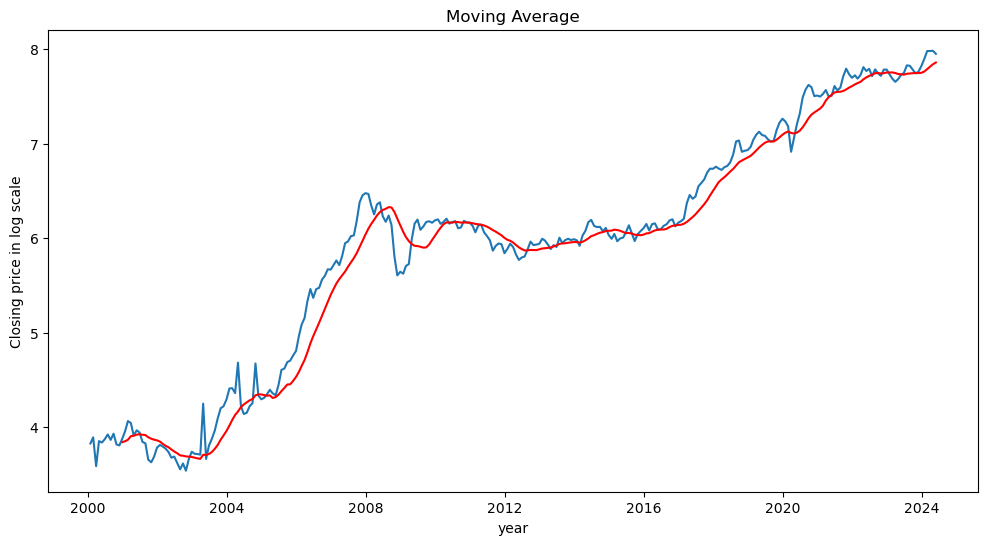

In [33]:
movingAverage = data_log.rolling(window = 12).mean()
movingAverage_std = data_log.rolling(window = 12).std()
plt.figure(figsize=(12,6))
plt.plot(data_log)
plt.plot(movingAverage, color = 'Red')
plt.xlabel('year')
plt.ylabel('Closing price in log scale')
plt.title('Moving Average')
plt.show()

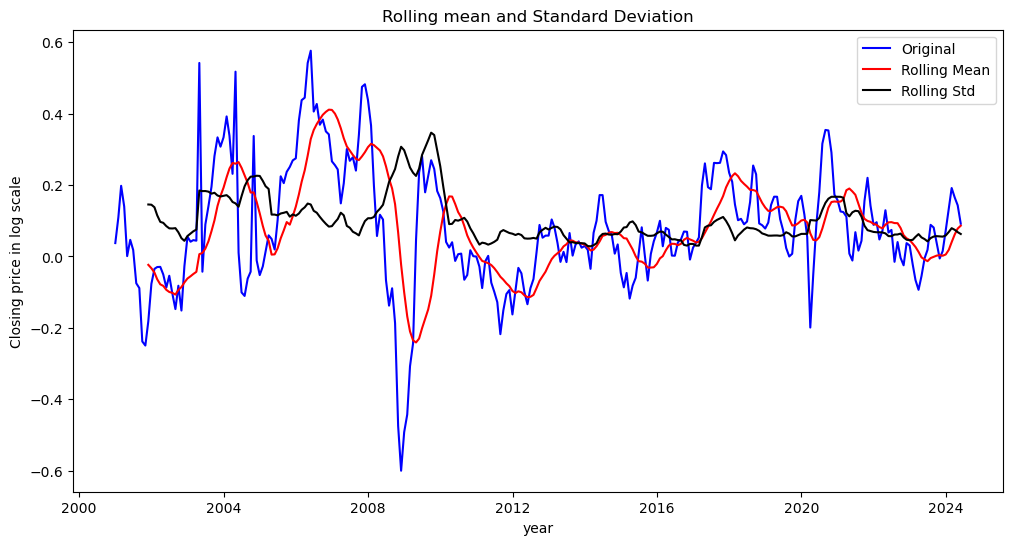

Result of Dickey-Fuller Test:
Test statistics          -4.825657
P-value                   0.000049
#Lags used                0.000000
Closing Price           281.000000
Critical Value (1%)      -3.453838
Critical Value (5%)      -2.871881
Critical Value (10%)     -2.572280
dtype: float64


In [34]:
dataset_In_timeseries = data_log - movingAverage
dataset_In_timeseries.dropna(inplace = True)
dataset_In_timeseries.head(20)

test_stationarity(dataset_In_timeseries)

In [35]:
# 'Dickey Fuller Test' Result Analysis:
#The P-values is 0.0004 which is less that 0.5.
#Test Statistic’ is less than the Critical Value to reject the null hypothesis.
#Stationary time series is when the mean and variance are constant over time. 
#Hence this look stationary data and look much better series.

### 3.Exponentially weighted moving average


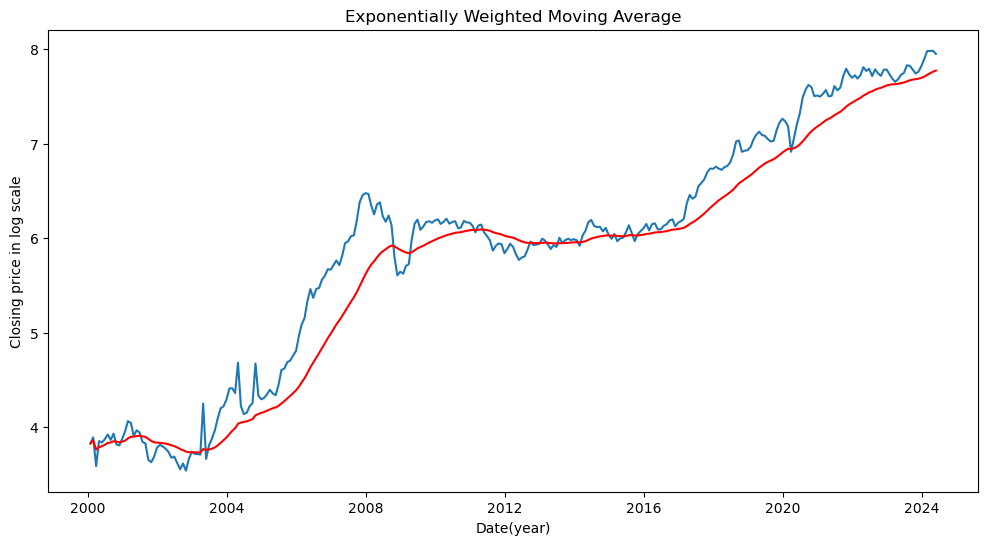

In [36]:
Exponential_weightedAverage = data_log.ewm(halflife =10, min_periods=0, adjust = True).mean()
plt.figure(figsize=(12,6))
plt.plot(data_log)
plt.plot(Exponential_weightedAverage, color='red')
plt.xlabel('Date(year)')
plt.ylabel('Closing price in log scale')
plt.title('Exponentially Weighted Moving Average')
plt.show()

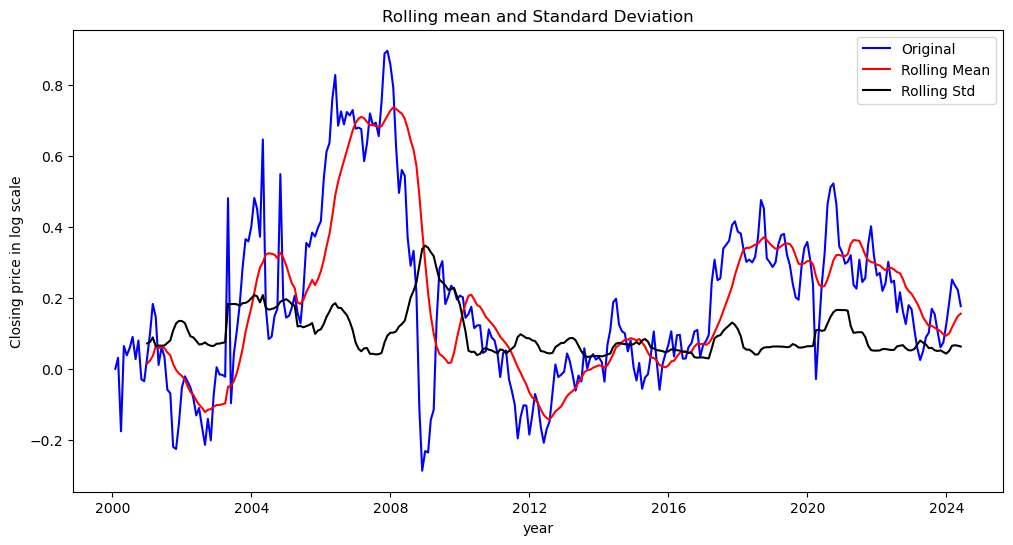

Result of Dickey-Fuller Test:
Test statistics          -3.012642
P-value                   0.033731
#Lags used                1.000000
Closing Price           291.000000
Critical Value (1%)      -3.453023
Critical Value (5%)      -2.871524
Critical Value (10%)     -2.572090
dtype: float64


In [37]:
Exponential_weightedAverage_Log = data_log - Exponential_weightedAverage
test_stationarity(Exponential_weightedAverage_Log)

In [38]:
# 'Dickey Fuller Test' Result Analysis:
#The P-values is 0.004568 which is less that 0.5. The Test-statistics and Critical Values for difference confidence levels.
#Test Statistic’ is less than the Critical Value hence null hypothesis can be rejected.
#Stationary time series is when the mean and variance are constant over time. 
#Hence this look stationary data, lesser variations in mean and standard deviation in magnitude and look much better series.

### 4.Differencing

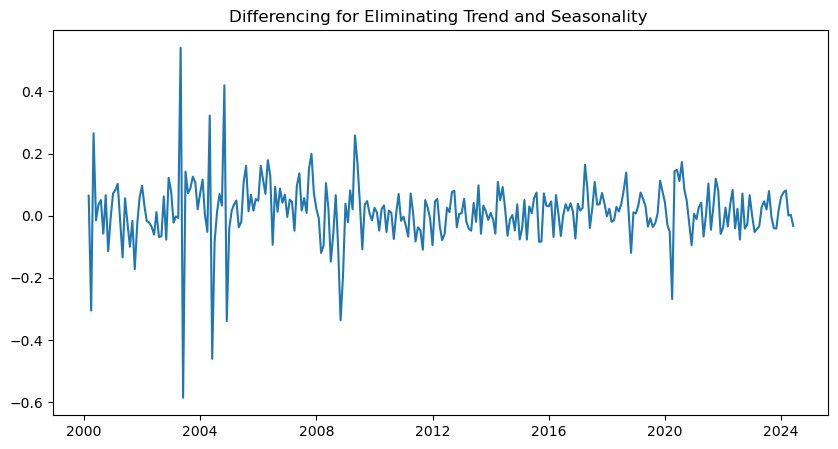

In [39]:
#Differencing is a method of transforming a non-stationary time series into a stationary one
datasetLogShift = data_log - data_log.shift()
plt.figure(figsize=(10,5))
plt.plot(datasetLogShift)
plt.title('Differencing for Eliminating Trend and Seasonality ')
plt.show()

               Close
Date                
2000-02-29  0.064344
2000-03-31 -0.305149
2000-04-30  0.265422
2000-05-31 -0.014912
2000-06-30  0.035018


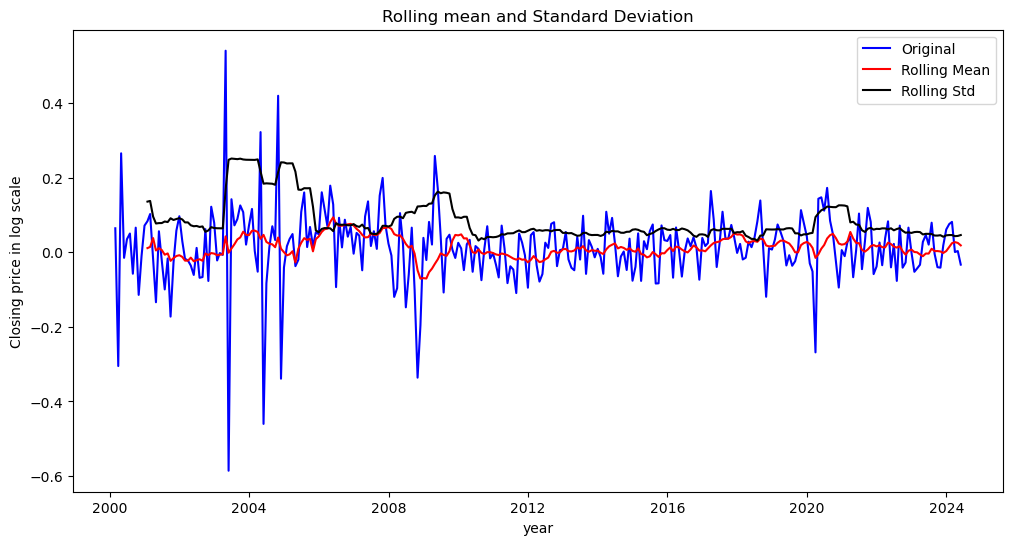

Result of Dickey-Fuller Test:
Test statistics         -19.211252
P-value                   0.000000
#Lags used                0.000000
Closing Price           291.000000
Critical Value (1%)      -3.453023
Critical Value (5%)      -2.871524
Critical Value (10%)     -2.572090
dtype: float64


In [40]:
datasetLogShift.dropna(inplace=True)
print(datasetLogShift.head())
test_stationarity(datasetLogShift)

#Note: The timeseries is stationary

In [41]:
#By visual analysis, it can be concluded that the rolling mean and standard deviation is quite flat and no variations.

# 'Dickey Fuller Test' Result Analysis:
#The P-values is is less that 0.5 and Test Statistic’ is less than the Critical Value
#Hence null hypothesis can be rejected and the data is stationary.

## Components of Time-Series:- Trend, Seasonal, Residual


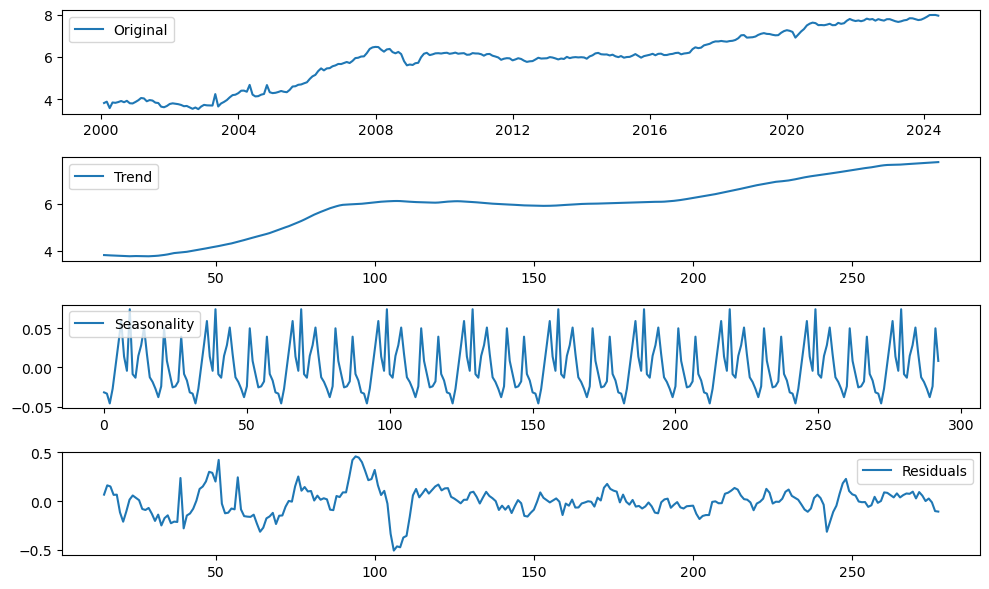

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data_log.values, period=30)

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

## Plot for ACF and PACF

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### 1. ACF(Auto-Regression)

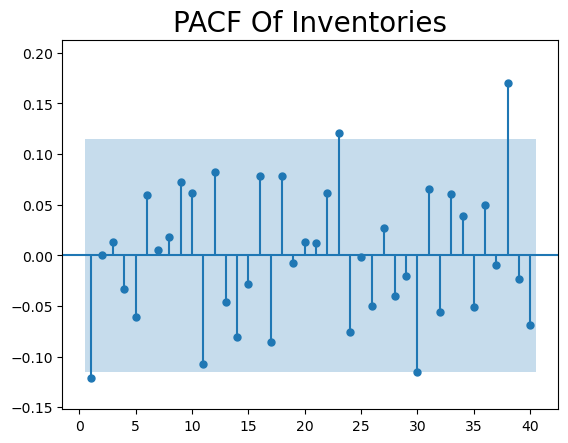

In [44]:
plot_pacf(datasetLogShift, lags=40, zero=False, auto_ylims=True)
plt.title("PACF Of Inventories",size=20)
plt.show()

### 2.PACF(Moving Average)


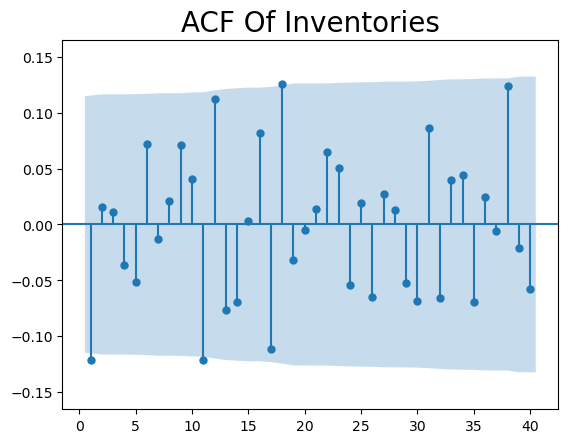

In [45]:
plot_acf(datasetLogShift, lags=40, zero=False, auto_ylims=True)
plt.title("ACF Of Inventories",size=20)
plt.show()

## ARIMA Model

In [46]:
from statsmodels.tsa.arima.model import ARIMA

In [47]:
#!pip install pmdarima

In [48]:
from pmdarima import auto_arima

In [49]:
auto_model = auto_arima(datasetLogShift,  trace=True, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-512.433, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-509.354, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-510.259, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-510.070, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-509.869, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-509.888, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-510.500, Time=0.25 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-509.835, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-508.383, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-504.865, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-504.883, Time=0.15 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-510.083, Time=0.30 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-516.876, Time=0.27 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-511.497, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept

### 1.AR Model (Auto-Regressive)

In [50]:
datasetLogShift.head()

,Close
Date,
2000-02-29,0.064344
2000-03-31,-0.305149
2000-04-30,0.265422
2000-05-31,-0.014912
2000-06-30,0.035018


Plotting AR model


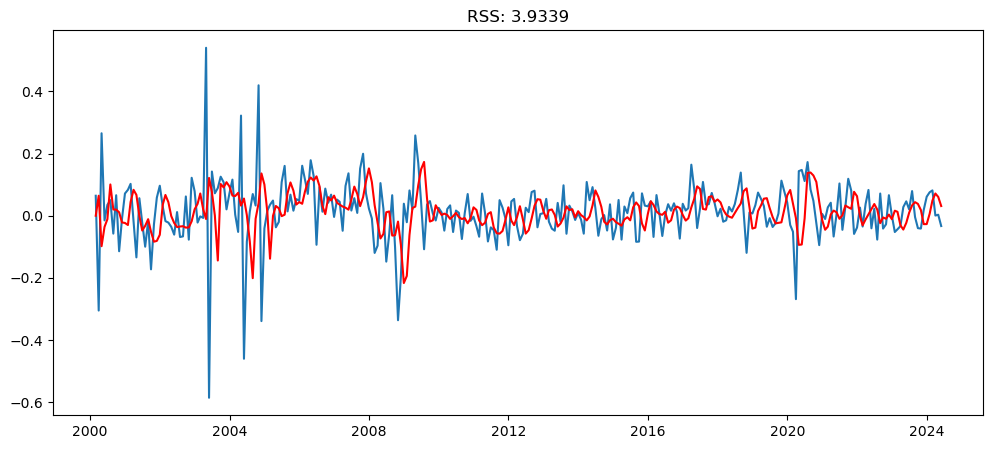

In [51]:
plt.figure(figsize=(12,5))
model = ARIMA(datasetLogShift, order = (2,1,0))
result_AR = model.fit()
plt.plot(datasetLogShift)
plt.plot(result_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((result_AR.fittedvalues-datasetLogShift["Close"])**2))
print('Plotting AR model')

### 2. MA Model (Moving Average)

Plotting MA model


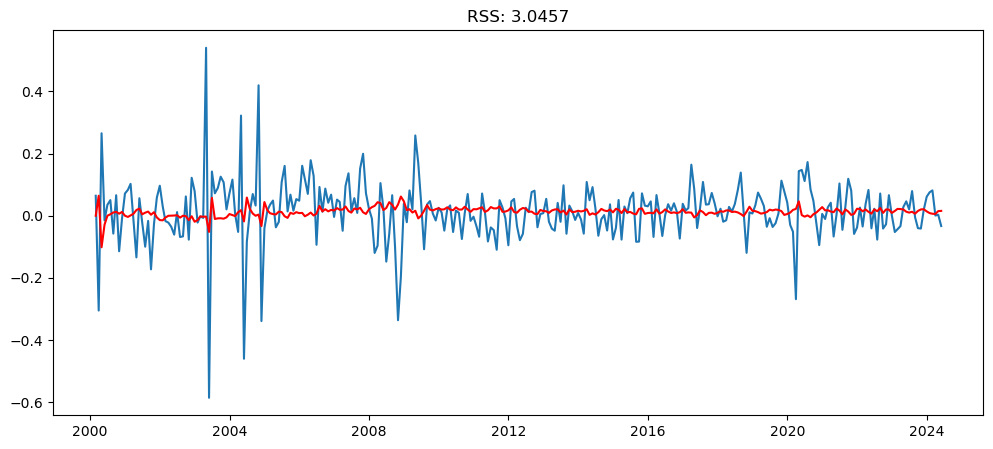

In [52]:
plt.figure(figsize=(12,5))
model = ARIMA(datasetLogShift, order = (0,1,2))
result_MA = model.fit()
plt.plot(datasetLogShift)
plt.plot(result_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((result_MA.fittedvalues-datasetLogShift["Close"])**2))
print('Plotting MA model')

### 3.ARIMA Model

Plotting ARIMA model


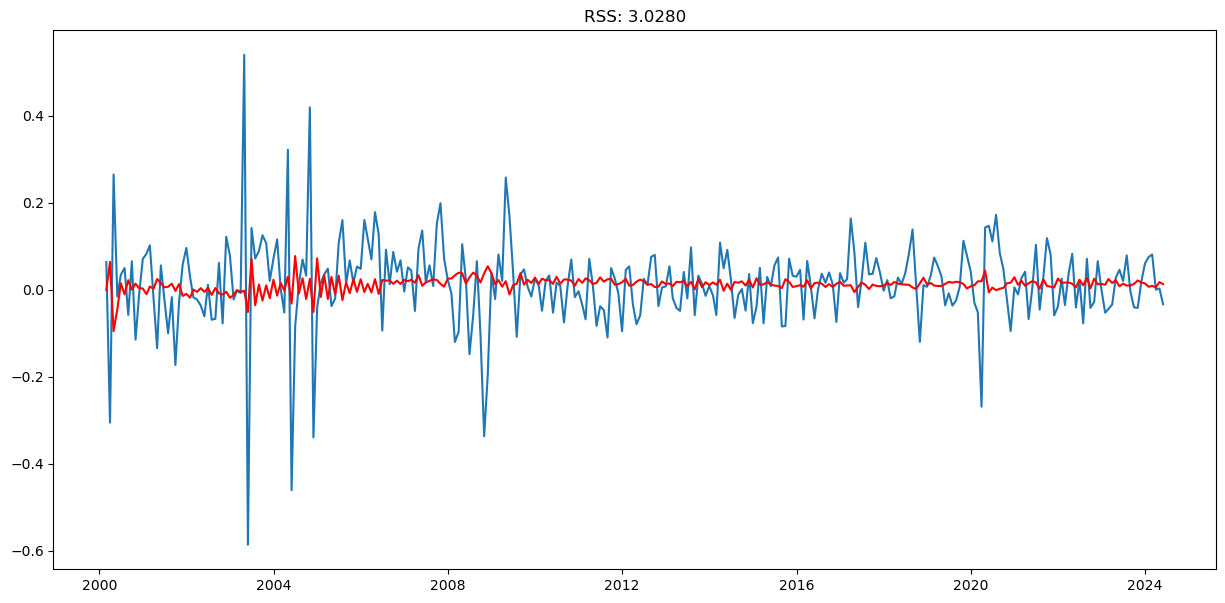

In [53]:
plt.figure(figsize=(15,7))
model = ARIMA(datasetLogShift, order = (2,1,2))
result_ARIMA= model.fit()
plt.plot(datasetLogShift)
plt.plot(result_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((result_ARIMA.fittedvalues-datasetLogShift['Close'])**2))
print('Plotting ARIMA model')

In [54]:
#Here we can see that the AR and MA models have almost the same RSS but combined is significantly better.

## Scale data back to the original scale


In [55]:
Prediction_ARIMA = pd.Series(result_ARIMA.fittedvalues, copy=True)
Prediction_ARIMA.head()

Date
2000-02-29    0.000000
2000-03-31    0.064344
2000-04-30   -0.094799
2000-05-31   -0.044452
2000-06-30    0.015529
Freq: M, dtype: float64

In [56]:
Prediction_ARIMA_cumsum = Prediction_ARIMA.cumsum()
Prediction_ARIMA_cumsum.head()

Date
2000-02-29    0.000000
2000-03-31    0.064344
2000-04-30   -0.030455
2000-05-31   -0.074907
2000-06-30   -0.059378
Freq: M, dtype: float64

In [57]:
predictions_ARIMA_log = pd.Series(data_log['Close'].iloc[0], index=data_log.index)
predictions_ARIMA_log= predictions_ARIMA_log.add(Prediction_ARIMA_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Date
2000-01-31    3.825531
2000-02-29    3.825531
2000-03-31    3.889875
2000-04-30    3.795076
2000-05-31    3.750624
Freq: M, dtype: float64

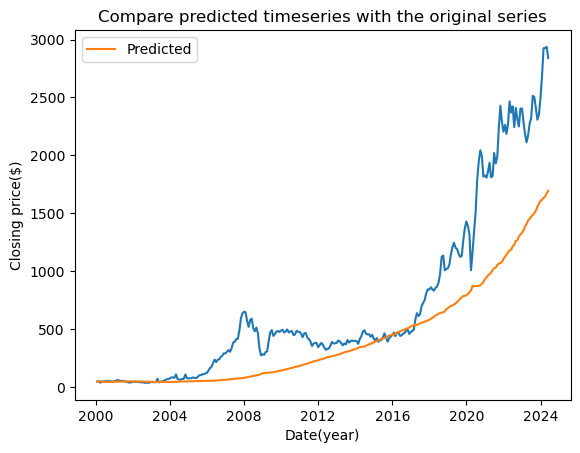

In [58]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data1)
plt.plot(predictions_ARIMA, label='Predicted')
plt.xlabel('Date(year)')
plt.ylabel('Closing price($)')
plt.title('Compare predicted timeseries with the original series')
plt.legend(loc='best')
plt.show()

## Forecasting for Future 2024-2028

In [59]:
model = ARIMA(data1, order=(2,1,2)).fit()

In [60]:
forecast_values = model.forecast(48)

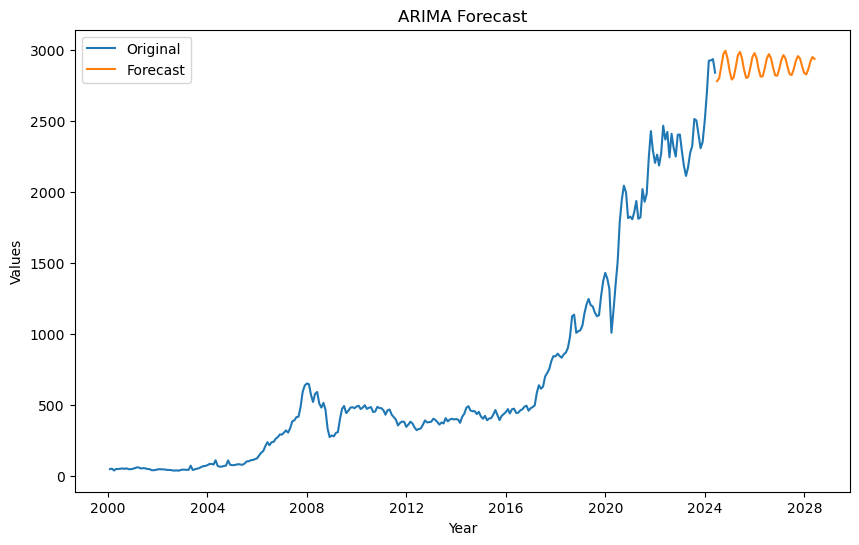

In [61]:
plt.figure(figsize=(10,6))
plt.plot(data1,label='Original')
plt.plot(forecast_values,label='Forecast')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [62]:
# Above all models, we have finalized ARIMA model for Model Building and Deployment
import pickle as pk
from pickle import dump
model = 'ARIMA.pkl'
dump(model,open(model,'wb'))